# Algorithmic Fairness, Accountability, and Ethics: 
## Data Analysis on the ProPublica Dataset 

**The goal of this exercise is to have you interact with the COMPAS dataset, to clean the dataset for analysis, extract insight, visualize findings, and replicate a part of the ProPublica's analysis. If you have worked already with the COMPAS dataset and find the exercise boring or redundant, consider working on the other exercises, or working on analyzing possible biases in a data set of your choice**


## Loading and surveying the data
* Load the dataset `compas-scores-two-years.csv`

### Columns of Interest:
* `age` - Age of the defendant. It is numeric.
* `age_cat` - Category of Age. It can be < 25, 25-45, >45.
* `sex` - Sex of the defendant. It is either 'Male' or 'Female'
* `race` - Race of the defendant. It can be 'African-American', 'Caucasian', 'Hispanic', 'Asian', or 'Other'.
* `c_charge_degree` - Degree of the crime. It is either M (Misdemeanor), F (Felony), or O (not causing jail time).
* `priors_count` - Count of prior crimes committed by the defendant. It is numeric.
* `days_b_screening_arrest` - Days between the arrest and COMPAS screening.
* `decile_score` - The COMPAS score predicted by the system. It is between 0-10.
* `score_text` - Category of decile score. It can be Low (1-4), Medium (5-7), and High (8-10).
* `is_recid` - A variable to indicate if recidivism was done by the defendant. It can be 0, 1, -1.
* `two_year_recid` - A variable to indicate if recidivism was done by the defendant within two years.
* `c_jail_in` - Time when the defendant was jailed.
* `c_jail_out` - Time when the defendant was released from the jail.

## Data Cleaning
Now that we have surveyed the dataset, let's look into cleaning the data. This data-cleaning is largely based off of ProPublica's methods. Requerements for the data filtering:
1. We only focus on cases where the COMPAS scored crime happened within +/- 30 days from when the person was arrested (if the value is missing, the record shoudl be removed). 
2. Then, we also get rid of cases where is_recid is -1 since we only want binary values for the purpose of our model (0 for no recidivism, 1 for yes recidivism). 
3. Finally, we don't want the c_charge_degree to be "O" which denotes ordinary traffic offenses (not as serious of a crime). 

Finish cleaning the dataset by filling in the code below based on the description above. The cleaned dataset should have 6172 records and 13 features.

(***Optional**) Create a "Lenghts of stay in jail" feature (you can compute this feature using `c_jail_in` and `c_jail_out`) and use it in the exercise*

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [3]:
cols = ["age", "age_cat", "sex", "race", "c_charge_degree", "priors_count", 
        "days_b_screening_arrest", "decile_score", "score_text", "is_recid", "two_year_recid",
        "c_jail_in", "c_jail_out"]
data = pd.read_csv("compas-scores-two-years.csv", usecols=cols)
data = data[(data["days_b_screening_arrest"] <= 30) & (data["days_b_screening_arrest"] >= -30)] 
data = data[data["is_recid"] >= 0] ##already cleaned
data = data[data["c_charge_degree"] != "O"] ##already cleaned
print("DataFrame shape:", data.shape)
data.head(5)

DataFrame shape: (6172, 13)


,sex,age,age_cat,race,decile_score,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_charge_degree,is_recid,score_text,two_year_recid
0,Male,69,Greater than 45,Other,1,0,-1.0,2013-08-13 06:03:42,2013-08-14 05:41:20,F,0,Low,0
1,Male,34,25 - 45,African-American,3,0,-1.0,2013-01-26 03:45:27,2013-02-05 05:36:53,F,1,Low,1
2,Male,24,Less than 25,African-American,4,4,-1.0,2013-04-13 04:58:34,2013-04-14 07:02:04,F,1,Low,1
5,Male,44,25 - 45,Other,1,0,0.0,2013-11-30 04:50:18,2013-12-01 12:28:56,M,0,Low,0
6,Male,41,25 - 45,Caucasian,6,14,-1.0,2014-02-18 05:08:24,2014-02-24 12:18:30,F,1,Medium,1


## Exploratory data Analysis

First, study basic statistics of the dataset (in case you make plots, make sure that you provide labels and titles)
* Frequency of different attributes (such as race, age, decile score, prio_counts)
* General descriptive statistics of the dataset

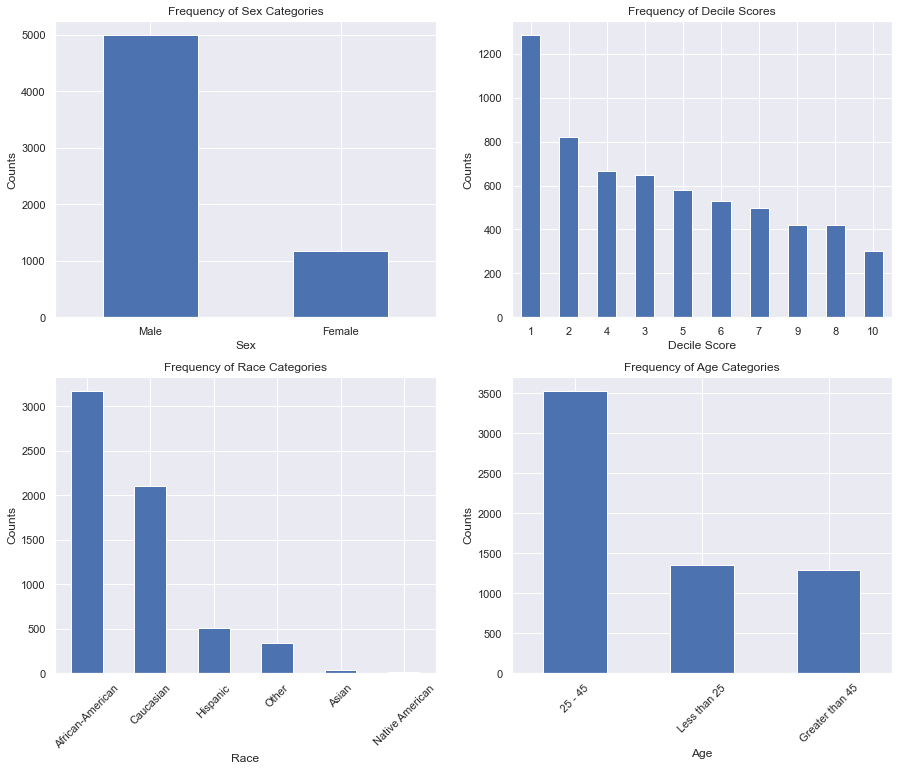

In [66]:
fig, ax = plt.subplots(2,2, figsize=(15,12))
pd.value_counts(data['race']).plot.bar(rot=45, title="Frequency of Race Categories", ylabel="Counts", xlabel="Race", ax=ax[1,0])
pd.value_counts(data['sex']).plot.bar(rot=0, title="Frequency of Sex Categories", ylabel="Counts", xlabel="Sex", ax=ax[0,0])
pd.value_counts(data['age_cat']).plot.bar(rot=45, title="Frequency of Age Categories", ylabel="Counts", xlabel="Age", ax=ax[1,1])
pd.value_counts(data['decile_score']).plot.bar(rot=0, title="Frequency of Decile Scores", ylabel="Counts", xlabel="Decile Score", ax=ax[0,1])
plt.show()

In [67]:
data.describe()

,age,decile_score,priors_count,days_b_screening_arrest,is_recid,two_year_recid,predicted_recid
count,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000
mean,34.534511,4.418503,3.246436,-1.740279,0.484446,0.455120,0.445723
std,11.730938,2.839463,4.743770,5.084709,0.499799,0.498022,0.497086
min,18.000000,1.000000,0.000000,-30.000000,0.000000,0.000000,0.000000
25%,25.000000,2.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
50%,31.000000,4.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
75%,42.000000,7.000000,4.000000,-1.000000,1.000000,1.000000,1.000000
max,96.000000,10.000000,38.000000,30.000000,1.000000,1.000000,1.000000


## Bias Analysis

**Question**: Study the distribution of the recidivism score `decile_score` for different categories: does recidivism have the same distribution for different races? For different genders? Make sure that your plots are comparable (e.g. axes have same scale)

**Answer:** Plots below show that distritbution of scores per race varies, while it is similar if we break it down by sex. We can also see drastic difference in *Age Categories*, where younger frequently get higher decile score.

Looking deeper into *Sex*:
* Even though distributions are similar, if we look at raw counts male appear more frequently in our data. More in the next answer.

Looking deeper into *Race*: 
* It is hard to conclude anythign about *Native Americans* as we have only few examples
* We can see a drastic difference in *African-American* samples (compared to sampels from other races). The distribution is uniform, while for other races it resembled the Exponential distribution (e.g. it is less likely to get high decile score if you are Asian compared to when you are African-American)

In [85]:
#ax = data.plot.hist(column=["decile_score"], by = "race" , figsize=(20,10), bins=10, sharex=True, ylim=(0,.6), 
#                    density=True, layout=(3,2), title="NORMALISED Counts for Race")

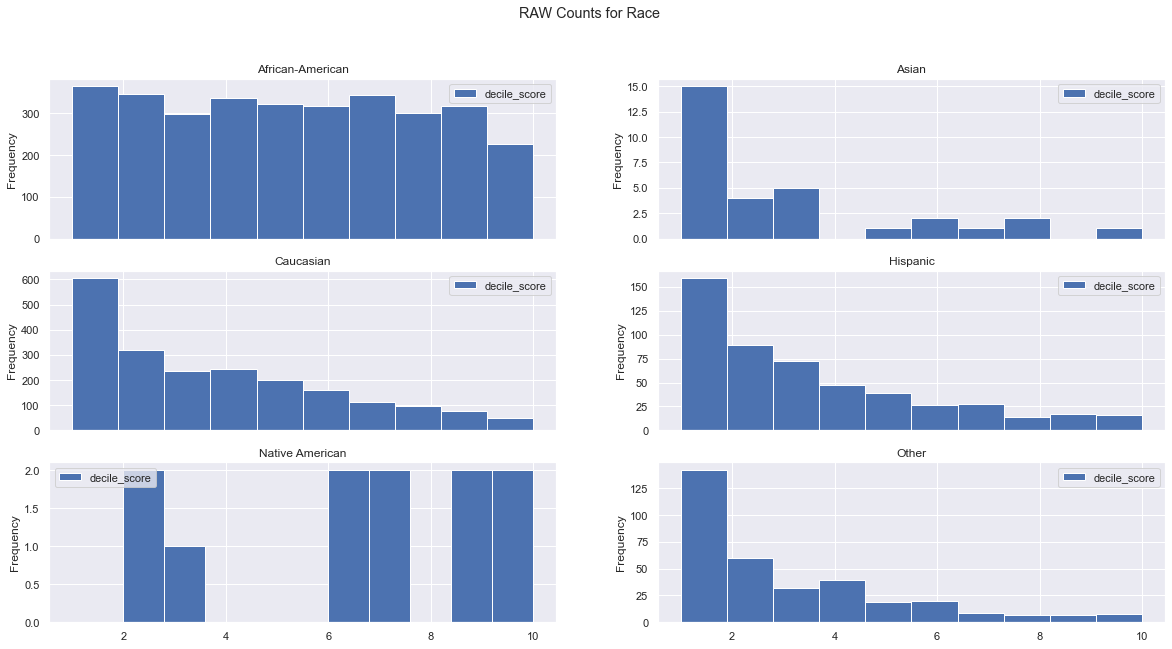

In [86]:
ax = data.plot.hist(column=["decile_score"], by = "race" , figsize=(20,10), bins=10, sharex=True, layout=(3,2), title="RAW Counts for Race")

In [87]:
#ax = data.plot.hist(column=["decile_score"], by = "sex" , facecolor= "green", figsize=(20,10), bins=10, sharex=True, ylim=(0,.6), 
#                    density=True, layout=(3,2), title="NORMALISED Counts per Sex")

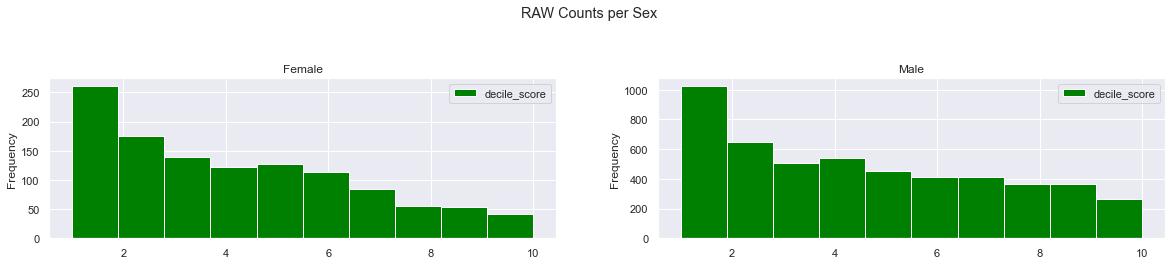

In [88]:
ax = data.plot.hist(column=["decile_score"], by = "sex" , facecolor= "green", figsize=(20,10), bins=10, layout=(3,2), title="RAW Counts per Sex")

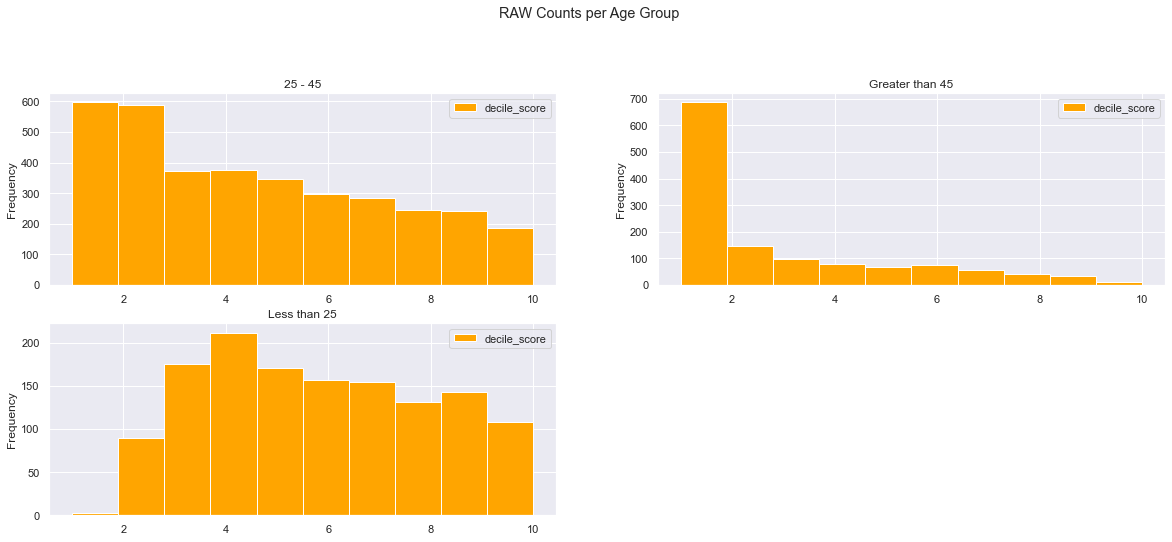

In [91]:
ax = data.plot.hist(column=["decile_score"], by = "age_cat" , facecolor= "orange", figsize=(20,12), 
                    bins=10, layout=(3,2), title="RAW Counts per Age Group", xlabel = "Decile Score")

**Questions**: If it is not distributed in the same way, which biases do you identify in the input dataset that can lead to different distributions? Think about "how data can unintentionally discriminate" from the theory class
* Is there a measurement bias? Explain
* Is there a population bias? Explain
* Is there a sampling bias? Explain

**Answer**:
* Population bias + Representation bias : There seem to be a population bias. Caucasian are less represented in the data set than Afro-Americans, although in the USA African-American amount only to roughly 12% of the whole population. Another good example is the *Native Americans* group, which has very few samples in our data, less than the population percentage. A possible explanation for this is that Native Americans live in isolated communities/reservations, hence crimes are not be always officialy reported or observed by the police.
* Sampling bias: Most probably there is sampling bias. Indeed, police officers tend to perform more checks in poor or disadvantaged neighborhoods, then they tend to detect more crimes in these areas and hence "sample" more crimes done by people with low socio-economic status and from racial minorities. Also, ample anedoctal evidence has been offered that police officers are more likely to arrest an African-American than Caucasian. Similarly, a police office might arrest more males than females (again, based on prejudices that males are more violent etc.)
* Measurement bias: measurement bias is likely to affect how recidivism is quantified. Here, recidivsm is measured as re-arrest. However, re-arrest implies that the person is actually caught committing again a crime. The sampling and population biases discussed above are likely to induce a bias in re-arrest, since some categories are more likely to be re-arrested than others.

**Question**: Look at the correlation between features. What can you notice? How could this affect the recidivism score? (*you can use `nominal` method from `dython` package to find correlations between categorical and continious variables. Read documentation to get more info.*)

**Answer**: 
* The least correlated feature is *sex* (which makes sense since the scores are distributed similary for both sexes).
* Interestingly the correlation between *age* and *decile score* seem to have a negative relationship, the older you get, less likele you'll have higher decile score.
* As discussed above, *race* and *age* does correlate with decile score.
* These correlations indicate that the algorithm is discriminating based on protected attributes. This is illegal, at least in the US legal system


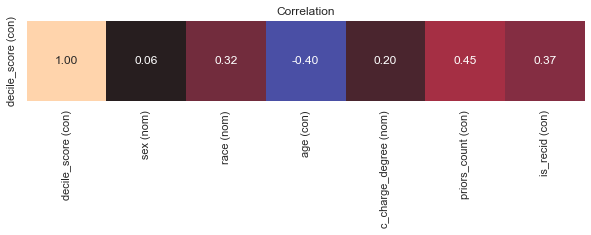

In [5]:
from dython import nominal
nominal.associations(data[["decile_score", "sex", "race", "age", "c_charge_degree", "priors_count", "is_recid"]],
                     figsize=(10,10),mark_columns=True, nom_nom_assoc="theil", display_rows=["decile_score"], cbar=False , title="Correlation")
plt.show()

In [6]:
#plt.figure(figsize=(20,5))
#data.groupby(["race"])["decile_score"].plot.hist(alpha=0.7, histtype="step", density = True, bins=10, legend=True)
#plt.show()
#corrMatrix = data.corr()
#sns.heatmap(corrMatrix, annot=True)
#plt.show()

## Replicating ProPublica Analysis
Propublica used the COMPAS scores to predict recidivism if the score was >=5 and no recidivism if the score was < 5.

This is not a complete analysis since it solely uses the decile score and does a hard thresholding for prediction, discarding all other aspects of individuals. But let's reproduce it anyway.

Let's call this thresholded version of predicted recividism `predicted_recid`.

* Compute the confusion matrix for each of the races
* Compute the error rate, false positive rate, and false negative rate for each of the races
* What do you conclude?

**Answer**:

The main take away is that our classifier is very much biased when it comes to the African-American (e.g. has a high False Positive Rate). Similarly, if we look at the Confusion Matrices (the one for African-Americans has lowest value of TN compared to other groups, we do not take into account Native-American statistics) and hight False Negative Rate - thus, in many cases we wrongfully identify many African-Americans as recidivists.

We can also see that Caucassian and Hispanic group has high FNR, which means that we often miss *recidivist* in these groups.

In [175]:
data["predicted_recid"] = data.apply(lambda x: 1 if x["decile_score"] >= 5 else 0, axis = 1)
data["accuracy"] = data["predicted_recid"] == data["is_recid"]

data['tp'] = (data["predicted_recid"] == 1) & (data['is_recid'] == 1)
data['fp'] = (data["predicted_recid"] == 1) & (data['is_recid'] == 0)
data['tn'] = (data["predicted_recid"] == 0) & (data['is_recid'] == 0)
data['fn'] = (data["predicted_recid"] == 0) & (data['is_recid'] == 1)

data_grouped = data.groupby("race")[["fp", "tn", "tp", "fn"]].sum()
data_grouped["fpr"] = data_grouped.apply(lambda x: x["fp"] / (x["fp"] + x["tn"]), axis = 1)
data_grouped["fnr"] = data_grouped.apply(lambda x: x["fn"] / (x["fn"] + x["tp"]), axis = 1)
data_grouped["err_rate"] = data_grouped.apply(lambda x: (x["fn"] + x["fp"]) / (x["tn"] + x["tp"] + x["fn"] + x["fp"]), axis = 1)

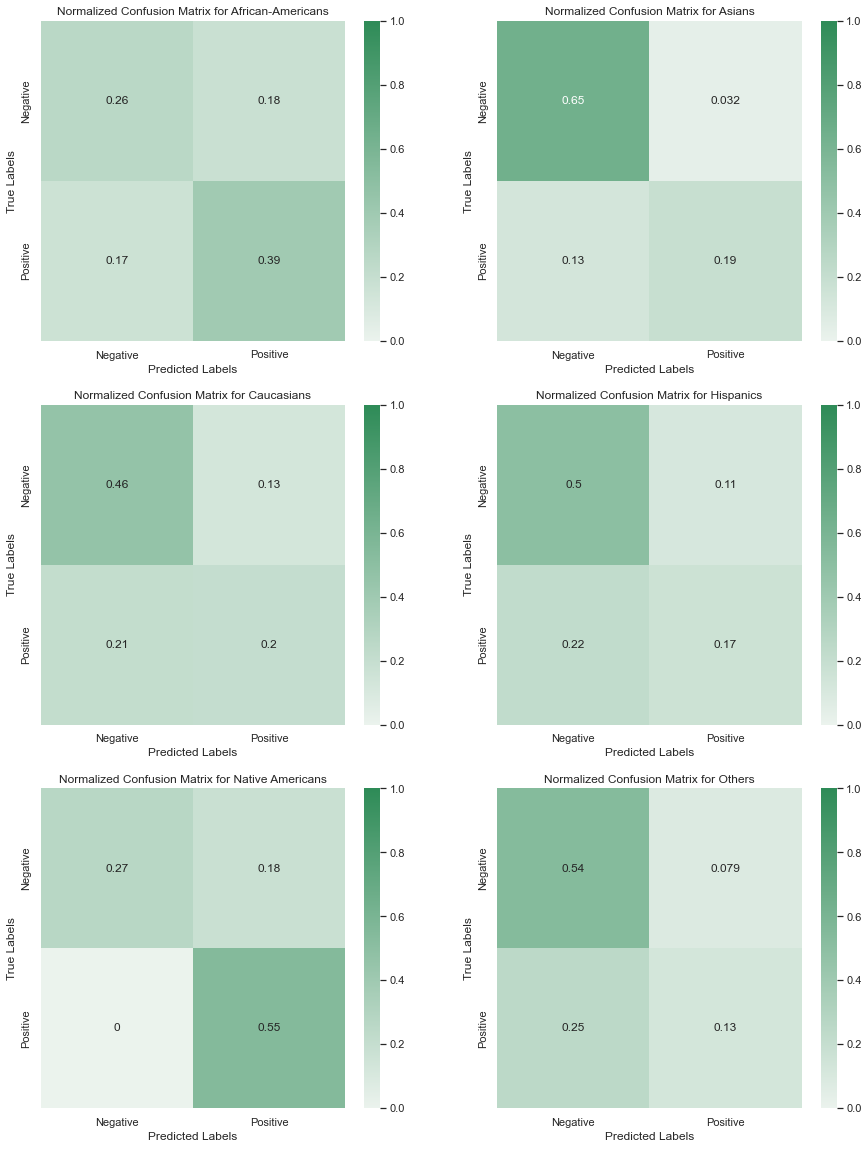

In [176]:
confusion_matrix = data_grouped[["tn", "fp", "fn", "tp"]].div(data_grouped[["tp", "tn", "fp", "fn"]].sum(axis=1), axis=0)
fig, ax = plt.subplots(3,2, figsize=(15,20))
idx = 0
attr = list(confusion_matrix.index)
for i in range(0,3):
    for j in range(0,2):
        sns.heatmap(confusion_matrix.loc[attr[idx]].values.reshape(2,2), 
                    xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"], 
                    cmap = sns.light_palette("seagreen", as_cmap=True), ax = ax[i,j], vmin = 0.0, vmax = 1.0, annot=True)
        ax[i,j].set_title("Normalized Confusion Matrix for %ss" %attr[idx])
        ax[i,j].set_xlabel("Predicted Labels")
        ax[i,j].set_ylabel("True Labels")
        idx +=1
plt.show()

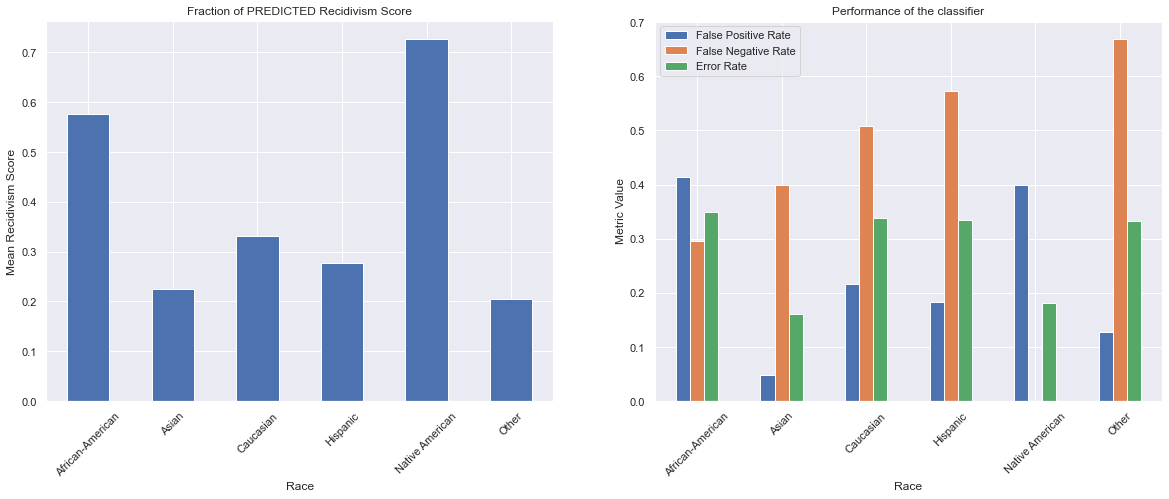

In [179]:
fig, ax = plt.subplots(1,2, figsize=(20,7))

data.groupby("race")["predicted_recid"].mean().plot.bar(title="Fraction of PREDICTED Recidivism Score", 
                                                        xlabel = "Race", ylabel = "Mean Recidivism Score", ax=ax[0], rot=45)
data_grouped[["fpr", "fnr", "err_rate"]].plot.bar(title="Performance of the classifier", 
                                                    ylabel="Metric Value", ax=ax[1], rot=45, xlabel = "Race")
ax[1].legend(["False Positive Rate", "False Negative Rate", "Error Rate"])

plt.show()

## References
- https://github.com/propublica/compas-analysis/
- https://www.propublica.org/article/how-we-analyzed-the-compas-recidivism-algorithm